# JPM444: Navigating the Information Age - Python Class 2

Install packages using `pip`. Packages can be loaded with "nicknames" to simplify the syntax.

In [48]:
#pip install pandas
#pip install numpy
#!pip install scikit-learn
!pip install krippendorff

import pandas as pd
import numpy as np
import sklearn
import krippendorff

#Inter-coder reliability

Load the dataset to new pandas dataframe object called `df`

In [49]:
df = pd.read_csv("/content/glowin_human_coing_IOs_sample_jpm444.csv")

##Percent agreement

In [50]:
df['agreement']= np.where(df['label_information_coder1']==df['label_information_coder2'], 1, 0)

In [51]:
df['agreement'].mean()

0.91

### Krippendorf alpha

Only keep variables with coding, and transpose the matrix.

In [52]:
df2=df[['label_information_coder1','label_information_coder2']]
df2=df2.T
df2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
label_information_coder1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,1,0,1,0,0
label_information_coder2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [53]:
krippendorff.alpha(df2,level_of_measurement = "nominal")

0.7924921793534933

Hand-created dataset

In [54]:
df = pd.DataFrame({'r1':[2,1,1,0,2],
                   'r2':[2,0,0,0,2]})
df2=df.T
df2


,0,1,2,3,4
r1,2,1,1,0,2
r2,2,0,0,0,2


In [55]:
krippendorff.alpha(df2,level_of_measurement = "ordinal")
krippendorff.alpha(df2,level_of_measurement = "nominal")


0.4375

# Binary classification evaluation

Load the dataset to new pandas dataframe object called `df`

In [56]:
df = pd.read_csv("/content/news_politics_1000.csv")
df


,id,label_true,label_assigned
0,id9360497,0,0
1,id99362516,0,0
2,id99255824,0,0
3,id6153524,0,0
4,id8959257,0,0
...,...,...,...
995,id9947102,0,0
996,id9943098,0,0
997,id9961475,0,0
998,id9925505,0,0


In [57]:
pd.crosstab(df['label_true'], df['label_assigned'])

label_assigned,0,1
label_true,,
0,619,52
1,61,268


Metrics functions included in sklearn

In [58]:
from sklearn import metrics

In [59]:
sklearn.metrics.precision_score(df[['label_true']], df[['label_assigned']])

0.8375

In [60]:
sklearn.metrics.recall_score(df[['label_true']], df[['label_assigned']])

0.8145896656534954

In [61]:
sklearn.metrics.f1_score(df[['label_true']], df[['label_assigned']])

0.8258859784283513

# Multiclass classification evaluation

In [62]:
df = pd.read_csv("/content/news_3categories_1000.csv")
df

,id,label_true,label_assigned
0,id6130868,politics,politics
1,id97273254,politics,politics
2,id9925505,human_interest,human_interest
3,id7755644,politics,politics
4,id6706349,economy,economy
...,...,...,...
995,id5757597,human_interest,human_interest
996,id99170554,politics,politics
997,id93415385,politics,politics
998,id9662899,politics,politics


In [63]:
sklearn.metrics.precision_score(df[['label_true']], df[['label_assigned']],average='macro')
#sklearn.metrics.precision_score(df[['label_true']], df[['label_assigned']],average='micro')

0.8651778737985635

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
cm=confusion_matrix(df[['label_true']],df[['label_assigned']],labels=['economy','human_interest','politics']) # True label is in the first position
cm

array([[288,  14,  32],
       [  9, 311,  20],
       [ 36,  23, 267]])

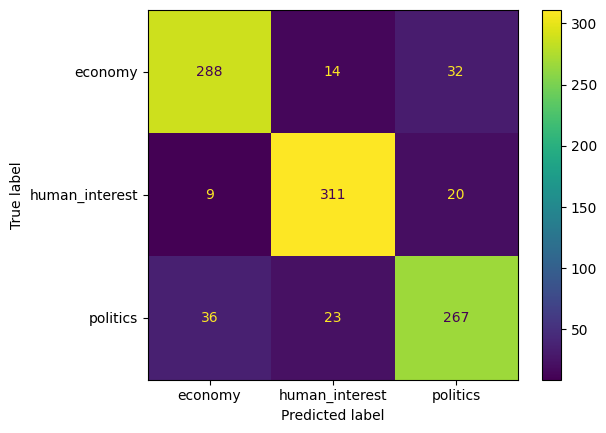

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['economy','human_interest','politics'])
disp.plot()

Export the figure

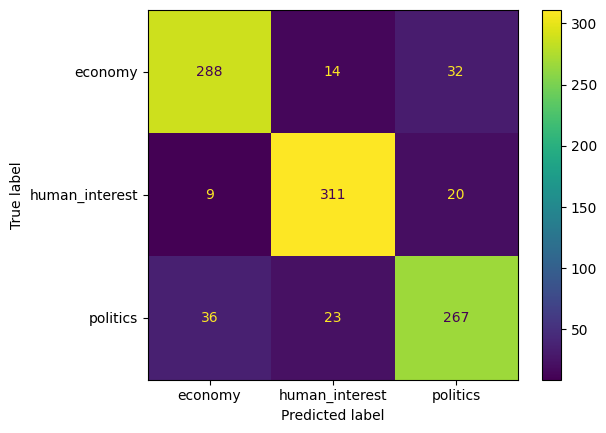

In [66]:
disp.plot().figure_.savefig('confusion_matrix.png')